In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv']


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh as sc_eigh
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset
train = pd.read_csv('../input/train.csv')
print(train.head())

#features
train_x = train.iloc[:,1:]
print('Training features:\n', train_x.head())

#label
train_y = train['label']
print('Labels:\n', train_y.head())

   label  pixel0  pixel1    ...     pixel781  pixel782  pixel783
0      1       0       0    ...            0         0         0
1      0       0       0    ...            0         0         0
2      1       0       0    ...            0         0         0
3      4       0       0    ...            0         0         0
4      0       0       0    ...            0         0         0

[5 rows x 785 columns]
Training features:
    pixel0  pixel1  pixel2    ...     pixel781  pixel782  pixel783
0       0       0       0    ...            0         0         0
1       0       0       0    ...            0         0         0
2       0       0       0    ...            0         0         0
3       0       0       0    ...            0         0         0
4       0       0       0    ...            0         0         0

[5 rows x 784 columns]
Labels:
 0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [4]:
# shape of our data:
print('Feature\'s shape:', train_x.shape)
print('Label\'s shape:', train_y.shape)

Feature's shape: (42000, 784)
Label's shape: (42000,)


Some images are : 


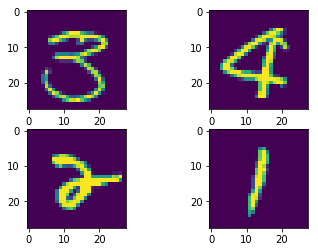

In [5]:
# plotting some number images:
print('Some images are : ')
fig, axes = plt.subplots(nrows = 2, ncols = 2)

num_img = train_x.iloc[7].values.reshape(28, 28)
axes[0,0].imshow(num_img, interpolation = 'none')

num_img2 = train_x.iloc[43].values.reshape(28,28)
axes[0,1].imshow(num_img2, interpolation = 'none')

num_img3 = train_x.iloc[34].values.reshape(28,28)
axes[1,0].imshow(num_img3, interpolation = 'none')

num_img4 = train_x.iloc[718].values.reshape(28,28)
axes[1,1].imshow(num_img4, interpolation = 'none')

plt.show()

In [6]:
# STEP 1: Data Standardization: mean = 0 , standard deviation = 1
sc = StandardScaler()
train_x_scaled = sc.fit_transform(train_x)
print('Shape of scaled data: ',train_x_scaled.shape)

Shape of scaled data:  (42000, 784)


In [7]:
# STEP 2: Compute Covariance:
covar_train_x = np.cov(train_x_scaled.T) # S = X.T*X
print('Shape of our covariance matrix:' ,covar_train_x.shape) # square symmetric matrix

Shape of our covariance matrix: (784, 784)


In [8]:
# calculating eigen values and corresponding eigrn vectors using scipy eigh:
eig_val, eig_vec = sc_eigh(covar_train_x, eigvals = (782,783)) # Only getting top 2 eigen values and corresponding eigen vectors.
print('eigen values:\n',eig_val)
print('eigen vectors:\n',eig_vec.T)
print('eigen vectors shape:\n',eig_vec.T.shape)
print('train_x_scaled transposed shape:\n', train_x_scaled.T.shape)

eigen values:
 [29.11146566 40.69647875]
eigen vectors:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
eigen vectors shape:
 (2, 784)
train_x_scaled transposed shape:
 (784, 42000)


In [9]:
# Getting new coordinates:
new_values = np.matmul(eig_vec.T, train_x_scaled.T) # matrix multiplication
print('New values:\n', new_values)
print('New values shape:\n', new_values.shape)

New values:
 [[-5.2264454   6.03299601 -1.70581328 ...  7.07627667 -4.34451279
   1.55912058]
 [-5.14047772 19.29233234 -7.64450341 ...  0.49539137  2.30724011
  -4.80767022]]
New values shape:
 (2, 42000)


In [10]:
# Adding labels so we can perfrom visualization based on labels:
new_values = np.vstack((new_values, train_y)).T
print(new_values)

[[-5.2264454  -5.14047772  1.        ]
 [ 6.03299601 19.29233234  0.        ]
 [-1.70581328 -7.64450341  1.        ]
 ...
 [ 7.07627667  0.49539137  7.        ]
 [-4.34451279  2.30724011  6.        ]
 [ 1.55912058 -4.80767022  9.        ]]


In [11]:
# Converting to dataframe:
pca_df = pd.DataFrame(new_values, columns = ['1st principal component', '2nd principal component', 'label'])
print(pca_df.head())

   1st principal component  2nd principal component  label
0                -5.226445                -5.140478    1.0
1                 6.032996                19.292332    0.0
2                -1.705813                -7.644503    1.0
3                 5.836139                -0.474207    4.0
4                 6.024818                26.559574    0.0


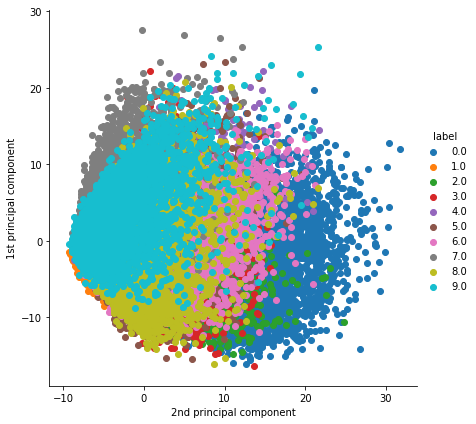

In [12]:
# visualization after dimensionality reduction (PCA):
sns.FacetGrid(pca_df, hue = 'label', height = 6).map(plt.scatter, '2nd principal component', '1st principal component')\
.add_legend()
plt.show()

In [13]:
#PCA USING SCIKIT LEARN

In [14]:
pca = PCA()
pca.n_components = 2 # top 2
sci_pca = pca.fit_transform(train_x_scaled)
print('Shape after reducing dimensionality:', sci_pca.shape)
print('pca data:\n', sci_pca.T)

Shape after reducing dimensionality: (42000, 2)
pca data:
 [[-5.14037057 19.29212958 -7.64458108 ...  0.49525586  2.30701161
  -4.8076972 ]
 [-5.22607098  6.03183874 -1.7060954  ...  7.07540598 -4.34551591
   1.55894698]]


In [15]:
sci_new_values = np.vstack((sci_pca.T, train_y)).T
print(sci_new_values)

[[-5.14037057 -5.22607098  1.        ]
 [19.29212958  6.03183874  0.        ]
 [-7.64458108 -1.7060954   1.        ]
 ...
 [ 0.49525586  7.07540598  7.        ]
 [ 2.30701161 -4.34551591  6.        ]
 [-4.8076972   1.55894698  9.        ]]


In [16]:
# creating the dataframe of our new coordinates:
sci_pca_df = pd.DataFrame(sci_new_values, columns = ['1st principal component', '2nd principal component', 'label'])
print(sci_pca_df.head()) # first 5 rows

   1st principal component  2nd principal component  label
0                -5.140371                -5.226071    1.0
1                19.292130                 6.031839    0.0
2                -7.644581                -1.706095    1.0
3                -0.474188                 5.836289    4.0
4                26.559451                 6.024051    0.0


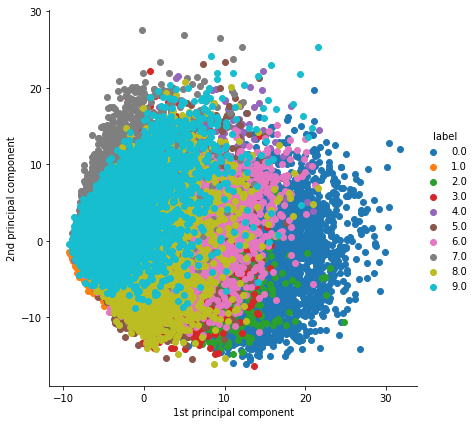

In [17]:
# Visualization in 2D:
sns.FacetGrid(sci_pca_df, hue = 'label', height = 6).map(plt.scatter, '1st principal component', '2nd principal component')\
.add_legend()
plt.show()

In [18]:
#VARIANCE EXPLANATION WITH NO. OF FEATURES

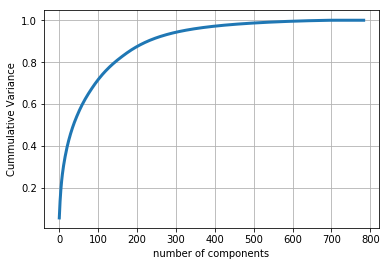

In [19]:
pca.n_components = 784 # considering all the features
pca_dat = pca.fit_transform(train_x_scaled)

# pca.explained_variance_ -  The amount of variance explained by each of the selected components
var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_) 
var_explained_cummulative = np.cumsum(var_explained)

plt.plot(var_explained_cummulative, linewidth = 3)
plt.grid()
plt.ylabel('Cummulative Variance')
plt.xlabel('number of components')
plt.show()